## Final Project Submission

Please fill out:
* Student name: Amani Wanene
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


1. Import relevant resources

In [829]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np


2. Import the datasets.

In [830]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz',encoding = 'latin1')
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter = '\t',encoding = 'latin1')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [831]:


import zipfile

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB


In [832]:
imdb_conn = sqlite3.connect('zippedData/im.db')


In [833]:
imdb_df = pd.read_sql("""SELECT * FROM movie_basics
 JOIN movie_ratings
USING(movie_id)
""",imdb_conn)

3.View the datasets

In [834]:
print(bom_df.shape)
bom_df.isna().sum()




(3387, 5)


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [835]:
print(movie_info_df.shape)
movie_info_df.isna().sum()

(1560, 12)


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [836]:
print(reviews_df.shape)
reviews_df.isna().sum()

(54432, 8)


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [837]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [838]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [839]:
print(imdb_df.shape)
imdb_df.isna().sum()

(73856, 8)


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

4. Clean Data

A) bom_df

In [840]:
#drop rows with missing domestic_gross
bom_df = bom_df.dropna(subset=['domestic_gross'])

print(bom_df.loc[bom_df['domestic_gross'].isna()])

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


In [841]:
#check percentage of foreign_gross missing values
bom_df['foreign_gross'].isna().sum()
missing_values_count = len(bom_df[bom_df['foreign_gross'].isna()])
total_rows = len(bom_df)

proportion_missing_values = missing_values_count / total_rows
print(proportion_missing_values)


0.40190532896695447


In [842]:
#Change null values to numeric in order to perform mathematical operations on the column.
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2004 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.5+ KB


In [843]:
#check the top 10 movies with missing foreign_domestic values
missing_foreign_gross_movies = bom_df[bom_df['foreign_gross'].isna()]
top_10_movies = missing_foreign_gross_movies.sort_values(by='domestic_gross', ascending=False).head(10)
print(top_10_movies)

                             title studio  domestic_gross  foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0            NaN  2015
3079        Avengers: Infinity War     BV     678800000.0            NaN  2018
1873                Jurassic World   Uni.     652300000.0            NaN  2015
1874                     Furious 7   Uni.     353000000.0            NaN  2015
2760       The Fate of the Furious   Uni.     226000000.0            NaN  2017
3160                     Book Club   Par.      68600000.0            NaN  2018
1955                      War Room   TriS      67800000.0            NaN  2015
2864                All Eyez on Me   LG/S      44900000.0            NaN  2017
833                Red Dawn (2012)     FD      44800000.0            NaN  2012
2866                47 Meters Down  ENTMP      44300000.0            NaN  2017


In [844]:
#filter out movies with domestic gross < $10,000,000
filtered_movies = bom_df[bom_df['domestic_gross'] >= 10000000]
filtered_movies.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross     58
year               0
dtype: int64

In [845]:
bom_df = filtered_movies

In [846]:
bom_df['gross_difference'] = bom_df['foreign_gross'] - bom_df['domestic_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,gross_difference
0,Toy Story 3,BV,415000000.0,652000000.0,2010,237000000.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,357100000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,368300000.0
3,Inception,WB,292600000.0,535700000.0,2010,243100000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,275200000.0


In [847]:
average_difference = bom_df['gross_difference'].mean()
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['domestic_gross'] + average_difference)
bom_df = bom_df.drop(columns=['gross_difference'])



In [848]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 3226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1170 non-null   object 
 1   studio          1170 non-null   object 
 2   domestic_gross  1170 non-null   float64
 3   foreign_gross   1170 non-null   float64
 4   year            1170 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 54.8+ KB


B) movie_info_df

In [849]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [850]:
#drop columns with many missing values.
movie_info_df.drop(columns=['currency','box_office','studio'],inplace=True)


In [851]:
#fill null values with str'N/A'
movie_info_df.fillna('N/A',inplace=True)

In [852]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   runtime       1560 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.8+ KB


C) reviews_df

In [853]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [854]:
reviews_df['rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

ratings seem to have different values I need to make all the ratings out of 10 for valid analysis to be performed

In [855]:

def convert_to_10(rating):
     # Ensure input is a string
    grade_mapping = {'A+': 10, 'A': 9.5, 'A-': 9, 'B+': 8.5, 'B': 8, 'B-': 7.5, 'C+': 7, 'C': 6.5, 'C-': 6, 'D+': 5.5, 'D': 5,'D-': 4.5, 'F+':2.5,'F': 2,'F-': 1.5}
    
    if rating in grade_mapping:
        return grade_mapping[rating]
    else:
        return rating
    


             

In [856]:
reviews_df['rating out_of_ten'] =  reviews_df['rating'].apply(convert_to_10)
reviews_df['rating out_of_ten'].unique()


array(['3/5', nan, 6.5, '2/5', 7.5, '2/4', 8, '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 9, '5/5', 2,
       '3.5/4', 5.5, '1.5/4', '3.5/5', '8/10', 8.5, '9/10', '2.5/5',
       '7.5/10', '5.5/10', 6, '1.5/5', '1/5', '5/10', 7, '0/5', '6',
       '0.5/4', 5, '3.1/5', '3/6', '4.5/5', '0/4', '2/10', 4.5, '7',
       '1/10', '3', 10, 9.5, '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10',
       '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0.5/10', '5', '0',
       '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5', '0.5/5', '1.5/10',
       '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5', '8.6/10', '6/8',
       '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10', '5/4', 'N',
       '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10', '5.9/10',
       '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4', '8.8/10',
       '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '3.2', '4.2',
       '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10', '3.6/5', '2/6',
       

In [857]:
def normalize_rating(rating):
    if rating is None or rating == 'N' or rating == 'R' or rating == 'T':
        return None  # Return None for special cases
    
    if '/' in str(rating):
        parts = rating.split('/')
        if ' ' in parts[0]:
            return None  # Treat irregular ratings like '3 1/2' as null
        numerator = float(parts[0])
        denominator = float(parts[1])
        return (numerator / denominator) * 10  # Normalize to be out of ten
    
    if '-' in str(rating):
        return None  # Treat irregular ratings like '1-5' as null
    
    return float(rating)  # For other cases, simply convert to float

# Test the function
ratings = ['3/6', '3.8/5', '1-5', '7', 'N', '9.8', 'R', 'T', None, '6/10', 0.7, '3 1/2','4.0/4','2.1/2']
for rating in ratings:
    normalized = normalize_rating(rating)
    print(f"{rating}: {normalized}")


3/6: 5.0
3.8/5: 7.6
1-5: None
7: 7.0
N: None
9.8: 9.8
R: None
T: None
None: None
6/10: 6.0
0.7: 0.7
3 1/2: None
4.0/4: 10.0
2.1/2: 10.5


In [858]:
reviews_df['rating out_of_ten'] = reviews_df['rating out_of_ten'].apply(normalize_rating)

In [859]:
reviews_df['rating out_of_ten'].unique()

array([ 6.        ,         nan,  6.5       ,  4.        ,  7.5       ,
        5.        ,  8.        , 10.        ,  2.5       ,  6.25      ,
        3.        ,  7.        ,  9.        ,  2.        ,  8.75      ,
        5.5       ,  3.75      ,  8.5       ,  0.        ,  1.25      ,
        6.2       ,  4.5       ,  1.        ,  9.5       , 10.5       ,
        7.4       ,  8.4       ,  7.2       ,  4.4       ,  0.5       ,
        7.7       ,  1.5       ,  2.3       ,  6.66666667,  3.5       ,
        8.6       ,  2.7       ,  4.2       ,  5.8       ,  7.1       ,
       12.5       ,  5.9       ,  4.8       ,  3.8       ,  4.9       ,
        5.75      ,  8.8       ,  2.2       ,  6.8       ,  7.3       ,
        3.2       , 11.        ,  6.3       ,  7.6       ,  8.1       ,
        3.33333333,  1.8       ,  8.9       ,  8.2       ,  8.3       ,
        4.33333333,  4.1       ,  7.9       ,  8.7       ,  4.3       ,
        9.6       ,  1.7       ,  6.7       ,  9.2       ,  5.2 

In [860]:
reviews_df.dropna(subset = ['rating out_of_ten'],inplace=True)

In [861]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40905 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40905 non-null  int64  
 1   review             35369 non-null  object 
 2   rating             40905 non-null  object 
 3   fresh              40905 non-null  object 
 4   critic             38925 non-null  object 
 5   top_critic         40905 non-null  int64  
 6   publisher          40685 non-null  object 
 7   date               40905 non-null  object 
 8   rating out_of_ten  40905 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.1+ MB


In [862]:
reviews_df.fillna('N/A',inplace=True)

In [863]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40905 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40905 non-null  int64  
 1   review             40905 non-null  object 
 2   rating             40905 non-null  object 
 3   fresh              40905 non-null  object 
 4   critic             40905 non-null  object 
 5   top_critic         40905 non-null  int64  
 6   publisher          40905 non-null  object 
 7   date               40905 non-null  object 
 8   rating out_of_ten  40905 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.1+ MB


D) imdb_df

In [864]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [865]:
imdb_df['genres'].fillna('N/A',inplace=True)

In [866]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


DATA ANALYSIS AND VISUALIZATION

A) Identify Movies with highest gross

In [867]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 3226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1170 non-null   object 
 1   studio          1170 non-null   object 
 2   domestic_gross  1170 non-null   float64
 3   foreign_gross   1170 non-null   float64
 4   year            1170 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 54.8+ KB


In [868]:
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3210,Free Solo,NGE,17500000.0,5.813447e+07,2018
3213,Hunter Killer,LG/S,15800000.0,5.643447e+07,2018
3216,Upgrade,BH Tilt,12000000.0,2.400000e+06,2018
3219,Welcome to Marwen,Uni.,10800000.0,2.100000e+06,2018
3226,The Old Man & the Gun,FoxS,11300000.0,5.193447e+07,2018


In [869]:
bom_df['worldwide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [870]:
bom_df_sorted = bom_df.sort_values(by='worldwide_gross', ascending=False)

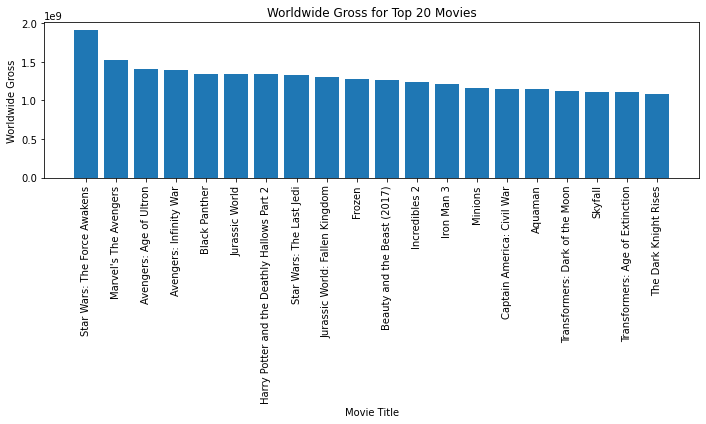

In [871]:

# Extract movie titles and worldwide gross
movie_titles = bom_df_sorted['title'].head(20)
worldwide_gross = bom_df_sorted['worldwide_gross'].head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(movie_titles, worldwide_gross)


plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross for Top 20 Movies')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [872]:
movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [873]:

# Remove the dollar sign ($) and commas from the specified columns
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('[$,]', '').astype(float)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace('[$,]', '').astype(float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('[$,]', '').astype(float)



movie_budgets_df.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [874]:
movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0


In [875]:
movie_budgets_df['foreign_gross'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['domestic_gross']

In [876]:
movie_budgets_df['net_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']

In [877]:
movie_budgets_sorted = movie_budgets_df.sort_values(by='net_profit', ascending=False)

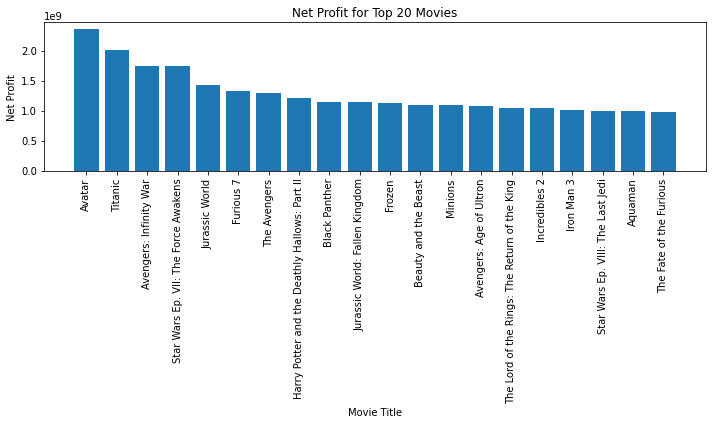

In [878]:
# Extract movie titles and worldwide gross
movie_titles = movie_budgets_sorted['movie'].head(20)
worldwide_gross = movie_budgets_sorted['net_profit'].head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(movie_titles, worldwide_gross)


plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Net Profit')
plt.title('Net Profit for Top 20 Movies')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


We've seen the top 20 movies in both data sets now we need to determine which genre these movies belong to . Starting with the bom_df_sorted. Since this data set does not contain movie id and the movie_info_df does not have movie titles then the only way we can get their genres is by using the imdb_df data 

In [879]:


# Merge the two dataframes based on the movie titles
merged_df = pd.merge(bom_df_sorted.head(100), imdb_df, left_on='title', right_on='primary_title', how='inner')

# Extract the genres column from the merged dataframe
top_100_genres = merged_df['genres']

# Display the count of each genre
genre_counts = top_100_genres.value_counts()
print(genre_counts)


Action,Adventure,Sci-Fi          24
Adventure,Animation,Comedy       16
Action,Adventure,Fantasy         10
Action,Adventure,Comedy           7
Action,Adventure,Animation        5
Action,Adventure,Thriller         5
Action,Crime,Thriller             3
Adventure,Fantasy                 2
Adventure,Family,Fantasy          2
Adventure,Drama,Sci-Fi            2
Adventure,Drama,Fantasy           2
Action,Adventure,Family           1
Drama,Sci-Fi,Thriller             1
Horror                            1
Drama,Romance,Thriller            1
Horror,Thriller                   1
Sci-Fi                            1
Action,Thriller                   1
Adventure,Drama,Sport             1
Biography,Drama,Music             1
Documentary,Drama,Sport           1
Comedy,Mystery                    1
Animation,Comedy,Family           1
Crime,Drama                       1
Biography,Documentary,History     1
Family                            1
Action,Adventure,Drama            1
Fantasy,Romance             

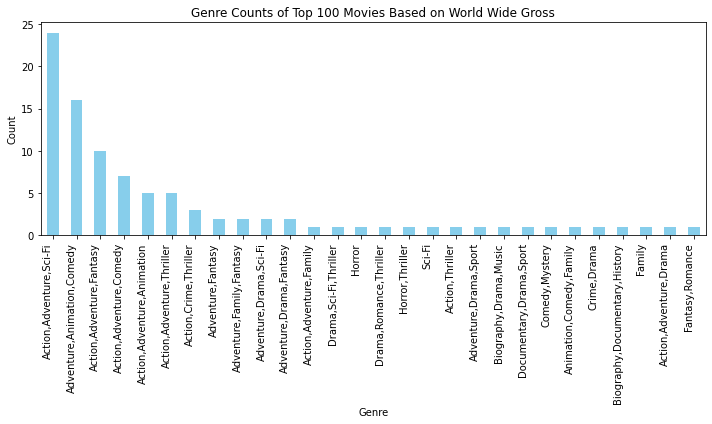

In [880]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Counts of Top 100 Movies Based on World Wide Gross')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

The graph above shows which combination of genres has the most movies with the highest world wide gross. Now lets check the individual genres.

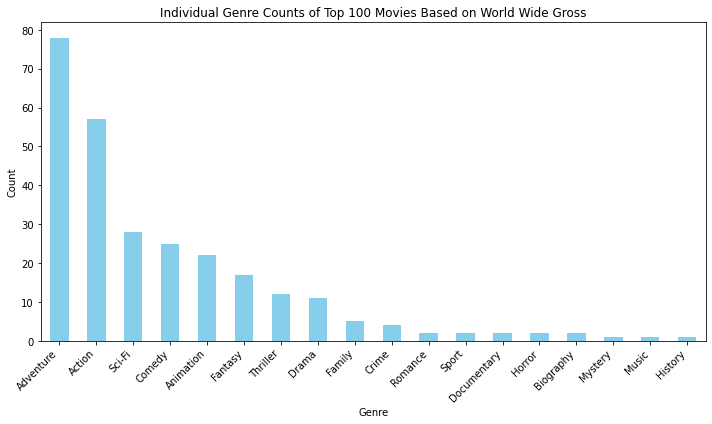

In [881]:


# Splitting multi-genre entries and creating a list of individual genres
individual_genres = top_100_genres.str.split(',').explode()

# Counting the occurrences of each individual genre
individual_genre_counts = individual_genres.value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
individual_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Individual Genre Counts of Top 100 Movies Based on World Wide Gross')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can do the same thing for movies in the movie budgets database. Since this is a relatively large database we can analyze the genre for the top 500 movies based on  net profit.

In [882]:
Info_Budgets_df = pd.merge(movie_info_df, movie_budgets_df, on='id', how='inner')
Info_Budgets_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_profit
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,4.384592e+08,5.564634e+08
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,"Mar 7, 2014",Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08,1.583000e+08,1.248064e+08
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,"Dec 17, 2010",How Do You Know?,120000000.0,30212620.0,4.962818e+07,1.941556e+07,-7.037182e+07
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,"Dec 11, 2015",In the Heart of the Sea,100000000.0,25020758.0,8.969331e+07,6.467255e+07,-1.030669e+07


In [883]:
Info_Budgets_df.sort_values(by='net_profit', ascending=False,inplace=True)

In [884]:
Info_Budgets_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_profit
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1798,43,Based on the play,NR,Classics|Comedy|Musical and Performing Arts,William Wellman,Nunnally Johnson,N/A,N/A,75 minutes,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09
232,7,N/A,NR,Drama|Romance,Rodney Bennett,Giles Cooper,N/A,N/A,200 minutes,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09
174,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,1.747311e+09
1392,34,Director John Woo brings Hong Kong-style marti...,PG-13,Action and Adventure|Mystery and Suspense,John Woo,William Goldman|John Logan|David Marconi|Micha...,"Dec 31, 2000","Nov 7, 2000",123 minutes,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08,1.433855e+09


In [885]:


# Extract the top 500 rows
top_500 = Info_Budgets_df.head(500)

# Calculate the value counts of 'genre' in the top 500
genre_counts_top_500 = top_500['genre'].value_counts()

# Display the value counts
print(genre_counts_top_500)


Drama                                                                    55
Comedy                                                                   38
Comedy|Drama                                                             34
Horror                                                                   19
Action and Adventure|Drama|Mystery and Suspense                          15
Comedy|Musical and Performing Arts                                       15
Drama|Mystery and Suspense                                               15
Action and Adventure|Drama|Science Fiction and Fantasy                   15
Comedy|Romance                                                           14
Art House and International|Comedy|Drama|Musical and Performing Arts     14
Action and Adventure|Mystery and Suspense                                13
Action and Adventure|Classics|Drama                                      11
Mystery and Suspense                                                     11
Classics|Com

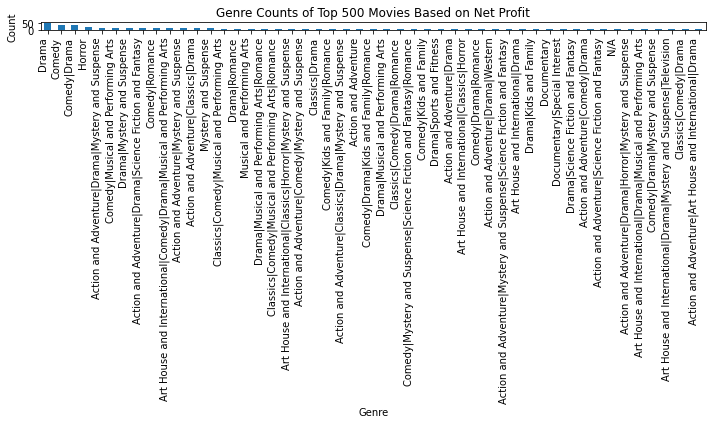

In [886]:
plt.figure(figsize=(10, 6))
genre_counts_top_500.plot(kind='bar',)
plt.title('Genre Counts of Top 500 Movies Based on Net Profit')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

We can see that the grouping of genres in the above graph makes it extremely difficult to visualize. Let's split the genres and fix this issue.

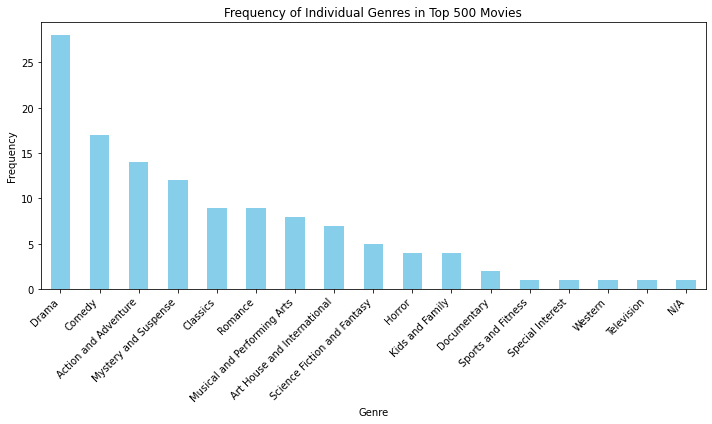

In [887]:




# Converting index to a Series and then splitting multi-genre entries to create a list of individual genres
individual_netprofit_genres = pd.Series(genre_counts_top_500.index.str.split('|')).explode()

# Counting the occurrences of each individual genre
individual_netprofit_genre_counts = individual_netprofit_genres.value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
individual_netprofit_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Individual Genres in Top 500 Movies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can now clearly see that drama movies generate the greatest net profit. Now lets look at the relationship between production budget and net profit.

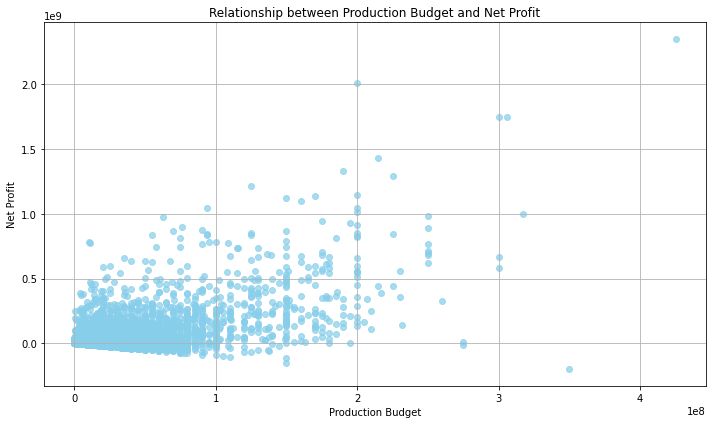

In [888]:

# Extracting 'production_budget' and 'net_profit' columns
production_budget = Info_Budgets_df['production_budget']
net_profit = Info_Budgets_df['net_profit']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, net_profit, color='skyblue', alpha=0.7)
plt.title('Relationship between Production Budget and Net Profit')
plt.xlabel('Production Budget')
plt.ylabel('Net Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


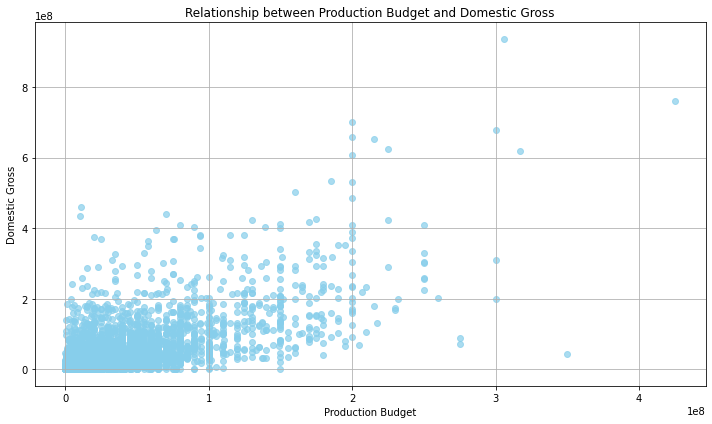

In [889]:

# Extracting 'production_budget' and 'net_profit' columns
production_budget = Info_Budgets_df['production_budget']
net_profit = Info_Budgets_df['domestic_gross']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, net_profit, color='skyblue', alpha=0.7)
plt.title('Relationship between Production Budget and Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.grid(True)
plt.tight_layout()
plt.show()


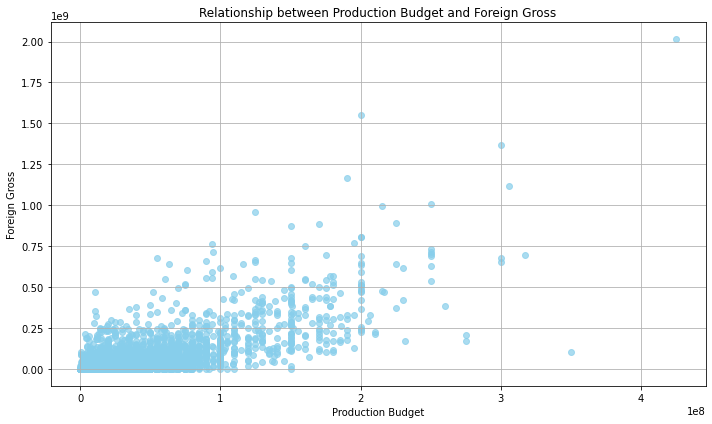

In [890]:


# Extracting 'production_budget' and 'net_profit' columns
production_budget = Info_Budgets_df['production_budget']
net_profit = Info_Budgets_df['foreign_gross']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, net_profit, color='skyblue', alpha=0.7)
plt.title('Relationship between Production Budget and Foreign Gross')
plt.xlabel('Production Budget')
plt.ylabel('Foreign Gross')
plt.grid(True)
plt.tight_layout()
plt.show()


From the above scatter plots we can see that there is a low positive relationship between an increase in production budget and an increase in the foreign gross,domestic,gross and net profit for a movie

B) Movies with the best ratings.

In [891]:
Info_Budgets_Reviews_df = pd.merge(Info_Budgets_df, reviews_df, on='id', how='inner')

There are multiple reviews for a singular movie so the best thing to do is get the average rating for the movies and then analyze the data accordingly

In [892]:
Sorted_Info_Budgets_Reviews_df = Info_Budgets_Reviews_df.sort_values(by='net_profit',ascending=False)

In [893]:
len(Sorted_Info_Budgets_Reviews_df)

141622

In [894]:
# Grouping the data by 'id' and calculating the mean of 'rating out_of_ten'
average_rating_by_id = Sorted_Info_Budgets_Reviews_df.groupby('id')['rating out_of_ten'].mean()

# Creating a new DataFrame with 'id' as index and 'rating out_of_ten' as a column
average_rating_df = average_rating_by_id.reset_index(name='average_rating')

# Displaying the resulting DataFrame
print(len(average_rating_df))


59


In [895]:
combined_average_rating_df = pd.merge(average_rating_df,movie_budgets_df,on='id')

In [896]:
combined_average_rating_df.sort_values(by='net_profit',ascending=False).head(20)

,id,average_rating,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_profit
1334,43,7.000000,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09
116,6,5.963415,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,1.747311e+09
1044,34,6.074219,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08,1.433855e+09
2378,67,4.358974,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.165716e+09,1.328723e+09
2148,61,5.942308,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,9.605000e+08,1.216693e+09
291,13,6.976316,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,8.880530e+08,1.135773e+09
1857,56,6.386364,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,8.717319e+08,1.122470e+09
1103,35,7.517857,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,7.551855e+08,1.099200e+09
874,26,6.666667,"Dec 17, 2003",The Lord of the Rings: The Return of the King,94000000.0,377845905.0,1.141403e+09,7.635574e+08,1.047403e+09
1392,44,5.708333,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,6.339390e+08,1.042521e+09


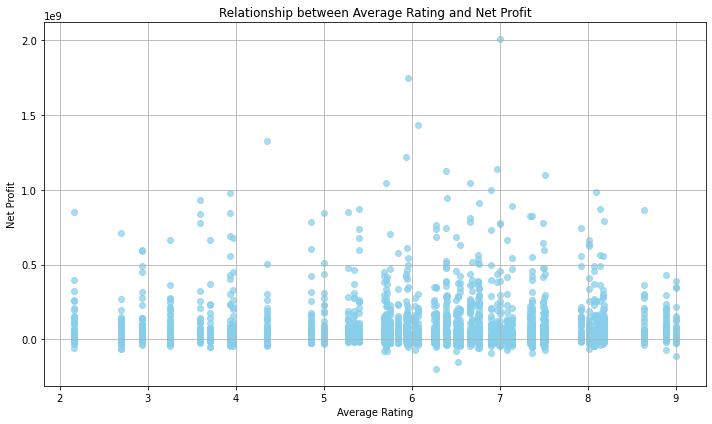

In [897]:

net_profit = combined_average_rating_df['net_profit']
average_rating = combined_average_rating_df['average_rating']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_rating, net_profit, color='skyblue', alpha=0.7)
plt.title('Relationship between Average Rating and Net Profit')
plt.xlabel('Average Rating')
plt.ylabel('Net Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


This shows that there is no clear relationship between rating and profit accrued by a movie